In [34]:
import urllib.request
import os

import pandas as pd
import numpy as np

if not os.path.exists("wiki-Vote.txt"):
    urllib.request.urlretrieve("https://snap.stanford.edu/data/wiki-Vote.txt.gz", "wiki-Vote.txt.gz")
    os.system("gzip -d wiki-Vote.txt.gz")

df = pd.read_csv("wiki-Vote.txt", delimiter="\t", comment="#", header=None, names=["start", "end"])

numnodes = max(df["start"].max(), df["end"].max()) + 1

 


In [36]:
A = np.zeros((numnodes, numnodes))
for row in df.itertuples(index=False):
    start_node = row[0]
    end_node = row[1]
    A[start_node][end_node] = 1


In [37]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
df.head()
data=df

In [6]:
df.head()

,start,end
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


In [64]:
import urllib.request
import os
import numpy as np
 
g_edges = np.loadtxt("wiki-Vote.txt", comments="#", delimiter="\t", dtype=int)
numnodes = 0
num_e = 0
for edge in  g_edges:
    num_e += 1
    if edge[0] > numnodes:
        numnodes = edge[0]
    if edge[1] > numnodes:
        numnodes = edge[1]
numnodes += 1

 
 
inside_deg = [0] * numnodes
out_deg= [0] * numnodes
 
for edge in  g_edges:
    out_node = edge[0]
    in_node = edge[1]
    out_deg[out_node] += 1
    inside_deg[in_node] += 1


 
s_in_deg = 0
s_out_deg = 0
for i in range(numnodes):
    s_in_deg += inside_deg[i]
    s_out_deg += out_deg[i]
    
average_in_degree = s_in_deg / numnodes
average_out_degree = s_out_deg / numnodes

 
maximum_inside_degree = 0
mx_i_deg = 0
maximum_outside_degree = 0
mx_o_deg = 0

for i in range(numnodes):
    in_degree_index = 0
    out_degree_i = 0
    for j in range(numnodes):
        in_degree_index += A[j][i]
        out_degree_i += A[i][j]
    if in_degree_index > mx_i_deg:
        maximum_inside_degree = i
        mx_i_deg = in_degree_index
    if out_degree_i > mx_o_deg:
        maximum_outside_degree = i
        mx_o_deg = out_degree_i

nw_density = num_e / (numnodes * (numnodes - 1))

 


In [65]:

print("NUMBER OF NODES", numnodes)
print("NUMBER OF EDGES:", num_e)
print("AVERAGE IN DEGREE:", average_in_degree)
print("AVERAGE OUT DEGREE:", average_out_degree)
print("NODE WITH MAX IN DEGREE:", maximum_inside_degree)
print("NODE WITH MAX OUT DEGREE:", maximum_outside_degree)
print("NETWORK DENSITY:", nw_density)
 

NUMBER OF NODES 8298
NUMBER OF EDGES: 103689
AVERAGE IN DEGREE: 12.495661605206074
AVERAGE OUT DEGREE: 12.495661605206074
NODE WITH MAX IN DEGREE: 4037
NODE WITH MAX OUT DEGREE: 2565
NETWORK DENSITY: 0.0015060457521039019


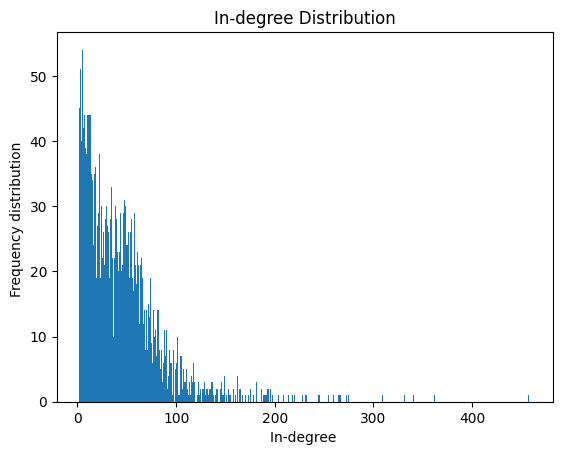

In [52]:
import matplotlib.pyplot as plt

 
plt.hist(inside_deg, bins=range(2, np.max(inside_deg)+ 3))
plt.title("In-degree Distribution")
plt.xlabel("In-degree ")
plt.ylabel("Frequency distribution ")
plt.show()


 


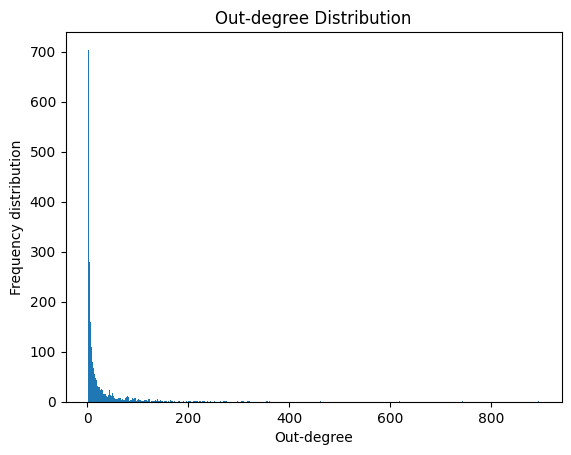

In [53]:

plt.hist(out_deg, bins=range(2, np.max(out_deg) + 3))
plt.title("Out-degree Distribution")
plt.xlabel("Out-degree")
plt.ylabel("Frequency distribution")
plt.show()

In [ ]:
cls_coeff = []
for node in range(numnodes):
    neighbors = np.where(A[node])[0]
    k = len(neighbors)
    if k < 2:
        cls_coeff.append(0)
    else:
        g_edges = 0
        for i in range(k):
            for j in range(i+1, k):
                if A[neighbors[i], neighbors[j]] == 1:
                    g_edges += 1
        clustering_coeff = 2 * g_edges / (k * (k-1))
        cls_coeff.append(clustering_coeff)
        print("Clustering coefficient for node", node, ":", clustering_coeff)



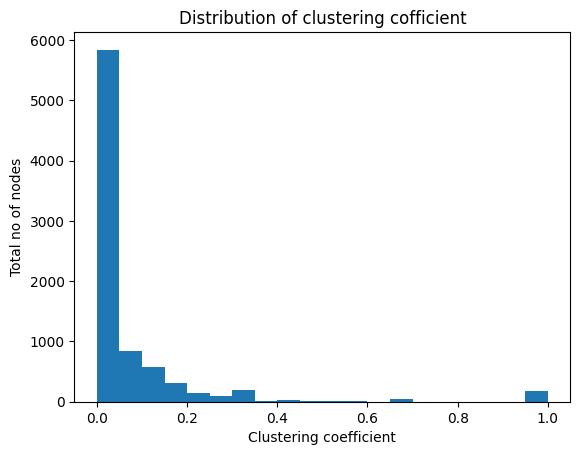

In [44]:


plt.hist(cls_coeff, bins=20)
plt.xlabel("clustering coefficient")
plt.ylabel("Total no of nodes")
plt.title("Distribution of clustering cofficient")
plt.show()
